In [536]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [537]:
url_us = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
US_state_data = pd.read_csv(url_us)
US_state_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,280,301,303,307,309,310,310,310,312,312
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,31,31,31,31,31,31,33,33,33,36
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,7916,8585,8714,8745,8862,9137,9366,9654,10010,10123
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,111,112,116,122,144,153,167,181,206,206


In [538]:
def get_state_confirmed(state):
    return US_state_data.loc[US_state_data["Province_State"]==state, :]
get_state_confirmed("New York").head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
1833,84036001,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,...,2152,2160,2164,2175,2183,2190,2208,2219,2225,2247
1834,84036003,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,...,63,63,63,64,64,64,66,66,66,68
1835,84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,...,0,0,0,0,0,0,0,0,0,0
1836,84036007,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,...,753,757,762,766,770,784,807,820,827,841
1837,84036009,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,...,127,128,128,130,131,134,138,138,138,139


In [539]:
#method that:
#creates a url from a given date
#reads in the data
#Specifies the columns we want
#adds the dates
def open_and_read_csv(dt):
    dt_month = dt.split("-")[1]
    dt_day = dt.split("-")[2]
    dt_year = "2020"
    dt_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/"+dt_month+"-"+dt_day+"-"+dt_year+".csv"
    df = pd.read_csv(dt_url)
    df = df[["Province_State", "Confirmed", "Deaths", "Recovered", "Active", "Incident_Rate", "People_Tested", "People_Hospitalized", "Mortality_Rate", "Testing_Rate", "Hospitalization_Rate"]]
    dates = []
    for i in range(df.shape[0]):
        dates.append(dt)
    df["Date"] = dates
    return df

In [540]:
from datetime import date
from datetime import timedelta
import numpy as np
from datetime import datetime
today = datetime.date(datetime.now())
dt = date(2020, 4, 12)
df = open_and_read_csv(str(dt))
for i in range((today-dt).days-1):
    dt += timedelta(days=1)
    df = pd.concat([df, open_and_read_csv(str(dt))])

In [541]:
df["Severity"] = df["Mortality_Rate"]+df["Hospitalization_Rate"]
df["Closed"] = df["Recovered"]+df["Deaths"]
df["Survival_Probability"] = (1-(df["Deaths"]/df["Confirmed"]))*100
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Date,Severity,Closed,Survival_Probability
0,Alabama,3563,93,NaN,3470.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945,2020-04-12,14.875105,NaN,97.389840
1,Alaska,272,8,66.0,264.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059,2020-04-12,14.338235,74.0,97.058824
2,Arizona,3542,115,NaN,3427.0,48.662422,42109.0,NaN,3.246753,578.522286,NaN,2020-04-12,NaN,NaN,96.753247
3,Arkansas,1280,27,367.0,1253.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250,2020-04-12,12.265625,394.0,97.890625
4,California,22795,640,NaN,22155.0,58.137726,190328.0,5234.0,2.812020,485.423868,22.961176,2020-04-12,25.773196,NaN,97.192367


In [542]:
#returns a dataframe of the state's info
def get_state_df(state):
    return df.loc[df["Province_State"]==state]
ny = get_state_df("New York")
ny.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Date,Severity,Closed,Survival_Probability
35,New York,189033,9385,23887.0,179648.0,1121.124012,461601.0,42594.0,4.964742,2737.680538,22.532574,2020-04-12,27.497315,33272.0,95.035258
36,New York,195749,10058,23887.0,185691.0,1160.955517,478357.0,42712.0,5.138213,2837.057652,21.819779,2020-04-13,26.957992,33945.0,94.861787
36,New York,203020,10842,23887.0,192178.0,1204.078637,499143.0,46201.0,5.340361,2960.336041,22.756871,2020-04-14,28.097232,34729.0,94.659639
36,New York,214454,11617,23887.0,202837.0,1271.891833,526012.0,46201.0,5.417013,3119.691715,21.543548,2020-04-15,26.960560,35504.0,94.582987
36,New York,223691,14832,23887.0,208859.0,1326.674980,550579.0,50450.0,6.630575,3265.394601,22.553433,2020-04-16,29.184008,38719.0,93.369425


In [543]:
mobility_reports_url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=2a2bd4912d1fa29a'
mobility_data = pd.read_csv(mobility_reports_url)
mobility_data.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [544]:
us_mobility = mobility_data.loc[mobility_data["country_region"]=="United States"]
us_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
257549,US,United States,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
257550,US,United States,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
257551,US,United States,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
257552,US,United States,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
257553,US,United States,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [545]:
def get_state_mobility(state):
    return us_mobility[us_mobility["sub_region_1"]==state]
ny_mobility = get_state_mobility("New York")
ny_mobility.columns[7:]

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [546]:
def get_state_mobility_agg(state):
    return us_mobility[us_mobility["sub_region_1"]==state].groupby("date").mean().reset_index()
get_state_mobility_agg("New York").head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,36062.344262,9.096774,-0.967742,16.892857,10.625000,0.387097,-0.179487
1,2020-02-16,36062.344262,12.338710,1.048387,18.000000,4.909091,1.403226,-0.852941
2,2020-02-17,36062.344262,10.951613,1.500000,33.080000,0.939394,-29.338710,6.526316
3,2020-02-18,36062.344262,-3.177419,-6.677419,-8.750000,3.750000,-10.951613,3.423729
4,2020-02-19,36062.344262,4.870968,-1.016129,5.440000,2.757576,-9.177419,2.067797


In [547]:
#Write methods with state as argument 
#combining mobility data with us data set (starting from January)
#mobility data with us state reports (starting from April)
#individual linear regressions for each dataset

In [548]:
us_states_agg = US_state_data.groupby('Province_State').sum().reset_index()

<Figure size 432x288 with 0 Axes>

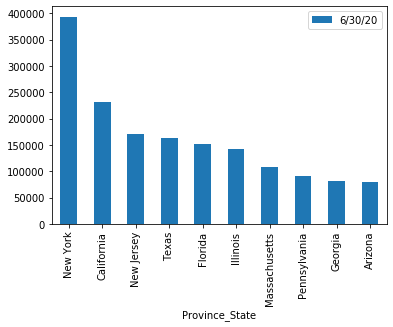

In [549]:
states_sorted = us_states_agg[["Province_State", "6/30/20"]]
states_sorted.index= states_sorted["Province_State"]
states_sorted = states_sorted.sort_values(by="6/30/20", ascending=False)
plt.figure()
states_sorted.head(10).plot(kind="bar")
#states_sorted

In [649]:
us_mobility.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

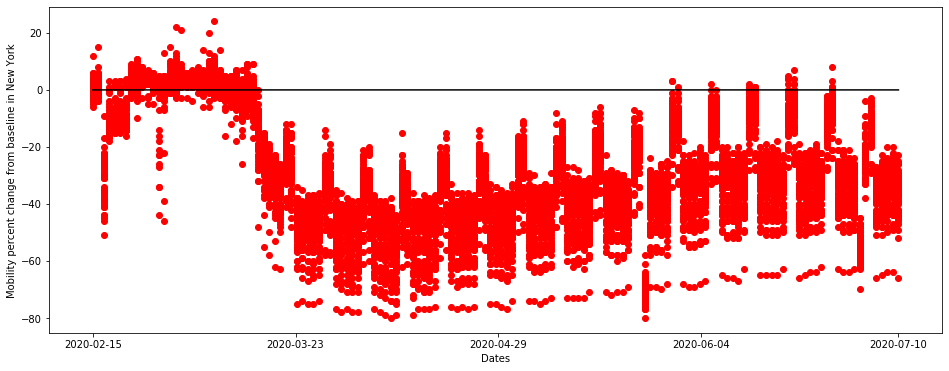

In [652]:
import matplotlib.pyplot as plt
def graph_state_mobility(state, var):
    fig, ax = plt.subplots(figsize=(16, 6)) 
    b = get_state_mobility(state)[var].isnull()==False
    x = get_state_mobility(state).loc[b, "date"]
    y = list(get_state_mobility(state).loc[b, var].values)
    plt.xlabel("Dates")
    plt.ylabel("Mobility percent change from baseline in "+state)
    plt.xticks([0, x.nunique()/4, x.nunique()/2, x.nunique()/4*3, x.nunique()-1])
    plt.scatter(x, y,color='r')
    plt.plot(x, np.zeros(len(x)), color="k")
    plt.show()
graph_state_mobility("New York", "workplaces_percent_change_from_baseline")

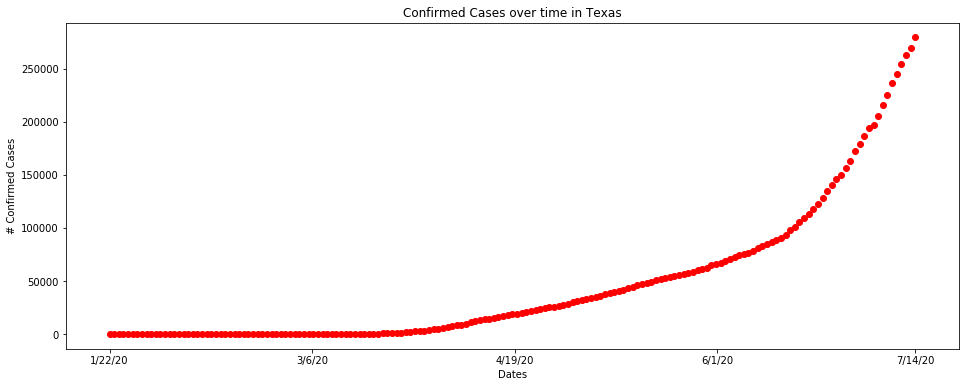

In [551]:
def graph_state_confirmed(state):
    fig, ax = plt.subplots(figsize=(16, 6)) 
    x = get_state_confirmed(state).columns[11:] 
    y =[]
    for d in x:
        y.append(get_state_confirmed(state)[d].sum())
    plt.ylabel("# Confirmed Cases")
    plt.xlabel("Dates")
    plt.title("Confirmed Cases over time in "+state)
    plt.xticks([0, len(y)/4, len(y)/2, len(y)/4*3, len(y)-1])
    plt.scatter(x, y,color='r')
    plt.show()
graph_state_confirmed("Texas")

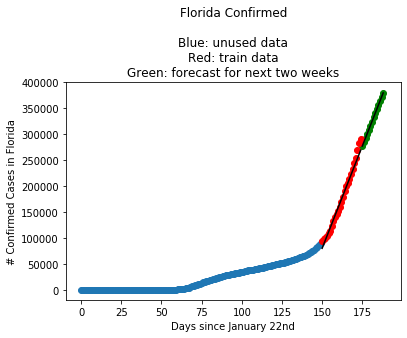

In [552]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
def predict_confirmed(state):
    #fig, ax = plt.subplots(figsize=(16, 6)) 
    total_days = get_state_confirmed(state).shape[1]-11
    SKIPDAYS = 150
    X = get_state_confirmed(state).columns[SKIPDAYS+11:]
    y =[]
    for d in X:
        y.append(get_state_confirmed(state)[d].sum())
    X = np.arange(SKIPDAYS, total_days).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    shuffle=False)
    linear_model = LinearRegression(fit_intercept=True)
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X)
    x_confirmed_forecast = np.arange(total_days, total_days+14)
    a_confirmed = linear_model.coef_
    b_confirmed = linear_model.intercept_
    y_confirmed_forecast = []
    for x in x_confirmed_forecast:
        y_confirmed_forecast.append(((a_confirmed * x) + b_confirmed)[0])
    #unused data
    plt.scatter(np.arange(SKIPDAYS), get_state_confirmed(state).iloc[:, 11:SKIPDAYS+11].sum().values.reshape(-1, 1))
    #forecast
    plt.scatter(x_confirmed_forecast, y_confirmed_forecast, color="g")
    #train data
    plt.scatter(X, y,color='r')
    #linear model (line of best fit)
    plt.plot(x_confirmed_forecast, y_confirmed_forecast, color="k")
    plt.plot(X, y_pred,color='k')
    #labels & titles
    plt.xlabel("Days since January 22nd")
    plt.ylabel("# Confirmed Cases in "+state)
    plt.title(state+" Confirmed\n\nBlue: unused data\nRed: train data\nGreen: forecast for next two weeks")
    plt.show()
    return y_confirmed_forecast
y_forecast = predict_confirmed("Florida")

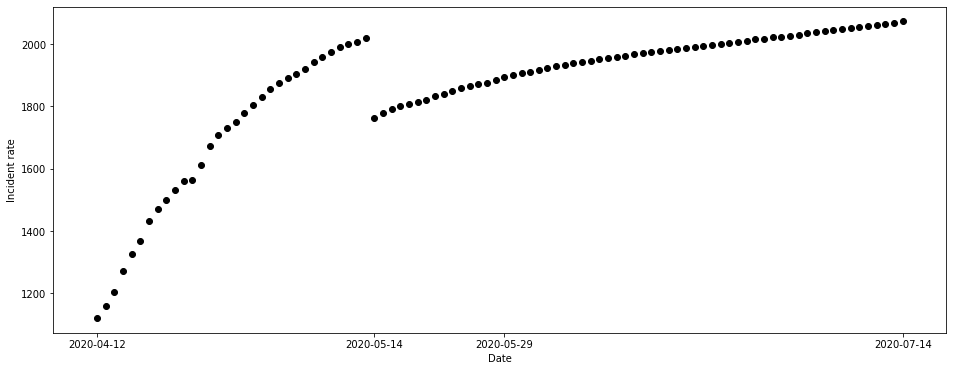

In [553]:
def graph_state_incident_rate(state_data):
    fig, ax = plt.subplots(figsize=(16, 6))     
    x = state_data["Date"]
    y = state_data["Incident_Rate"]
    plt.xlabel("Date")
    plt.ylabel("Incident rate")
    plt.xticks([0, 32, y.shape[0]/2, y.shape[0]-1])
    plt.scatter(x, y,color='k')
    plt.show()
graph_state_incident_rate(ny)

In [554]:
ny.loc[ny["Date"] == "2020-05-13", :]

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Date,Severity,Closed,Survival_Probability
36,New York,340661,27477,59193.0,253991.0,2020.405047,1258907.0,73963.0,8.06579,7466.372893,21.711614,2020-05-13,29.777403,86670.0,91.93421


In [555]:
def mobility_with_confirmed(state):
    y=[]
    x=[]
    for d in get_state_mobility(state).loc[get_state_mobility(state)["grocery_and_pharmacy_percent_change_from_baseline"].isnull()==False, "date"]:
        y.append(get_state_mobility(state).loc[get_state_mobility(state)["date"]==d, "grocery_and_pharmacy_percent_change_from_baseline"])
        
        x.append(get_state_confirmed(state)[d].sum())
    plt.scatter(x, y,color='r')
    plt.show()
#mobility_with_confirmed("New York")

In [556]:
get_state_df("New York")["Hospitalization_Rate"].isnull().sum()

0

In [557]:
get_state_mobility_agg("New York").head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,36062.344262,9.096774,-0.967742,16.892857,10.625000,0.387097,-0.179487
1,2020-02-16,36062.344262,12.338710,1.048387,18.000000,4.909091,1.403226,-0.852941
2,2020-02-17,36062.344262,10.951613,1.500000,33.080000,0.939394,-29.338710,6.526316
3,2020-02-18,36062.344262,-3.177419,-6.677419,-8.750000,3.750000,-10.951613,3.423729
4,2020-02-19,36062.344262,4.870968,-1.016129,5.440000,2.757576,-9.177419,2.067797


In [558]:
def return_combined_data(state):
    df = get_state_df(state)[:-4]
    df.index = np.arange(df.shape[0])
    mobility = get_state_mobility_agg(state)
    mobility = mobility.iloc[mobility.shape[0]-df.shape[0]:, :]
    mobility.index= df.index
    #print(mobility["date"])
    for col in mobility.columns[2:]:
        df[col] = mobility[col]
    df = df.drop("residential_percent_change_from_baseline", axis=1)
    df = df.drop("parks_percent_change_from_baseline", axis=1)

    return df
return_combined_data("New York").head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Date,Severity,Closed,Survival_Probability,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline
0,New York,189033,9385,23887.0,179648.0,1121.124012,461601.0,42594.0,4.964742,2737.680538,22.532574,2020-04-12,27.497315,33272.0,95.035258,-71.326531,-46.380000,-58.343750,-41.451613
1,New York,195749,10058,23887.0,185691.0,1160.955517,478357.0,42712.0,5.138213,2837.057652,21.819779,2020-04-13,26.957992,33945.0,94.861787,-57.520833,-25.509434,-57.657143,-51.258065
2,New York,203020,10842,23887.0,192178.0,1204.078637,499143.0,46201.0,5.340361,2960.336041,22.756871,2020-04-14,28.097232,34729.0,94.659639,-47.959184,-11.754717,-47.285714,-49.741935
3,New York,214454,11617,23887.0,202837.0,1271.891833,526012.0,46201.0,5.417013,3119.691715,21.543548,2020-04-15,26.960560,35504.0,94.582987,-43.620000,-10.038462,-47.891892,-49.677419
4,New York,223691,14832,23887.0,208859.0,1326.674980,550579.0,50450.0,6.630575,3265.394601,22.553433,2020-04-16,29.184008,38719.0,93.369425,-46.725490,-10.811321,-51.378378,-49.806452


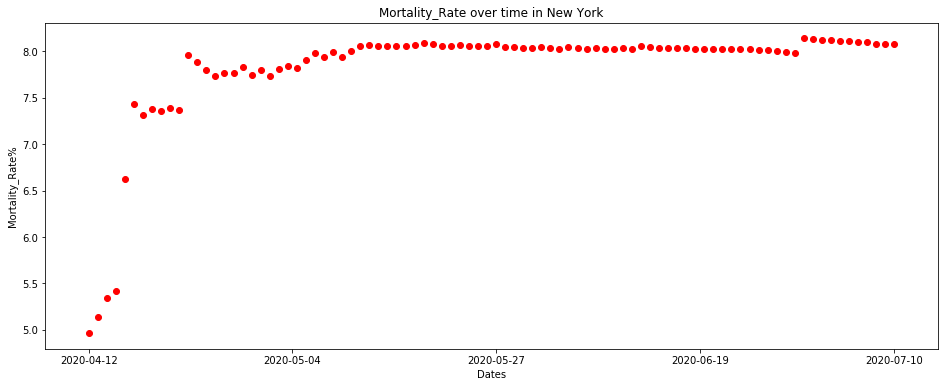

In [594]:
def graph_var_overtime(state, var):
    fig, ax = plt.subplots(figsize=(16, 6))
    df = return_combined_data(state)
    x = df["Date"]
    y = df[var]
    plt.xlabel("Dates")
    plt.ylabel(var)
    plt.title(var+ " over time in "+ state)
    plt.xticks([0, x.shape[0]/4, x.shape[0]/2, x.shape[0]/4*3, x.shape[0]-1])
    plt.scatter(x, y, color="r")
graph_var_overtime("New York", "Mortality_Rate")

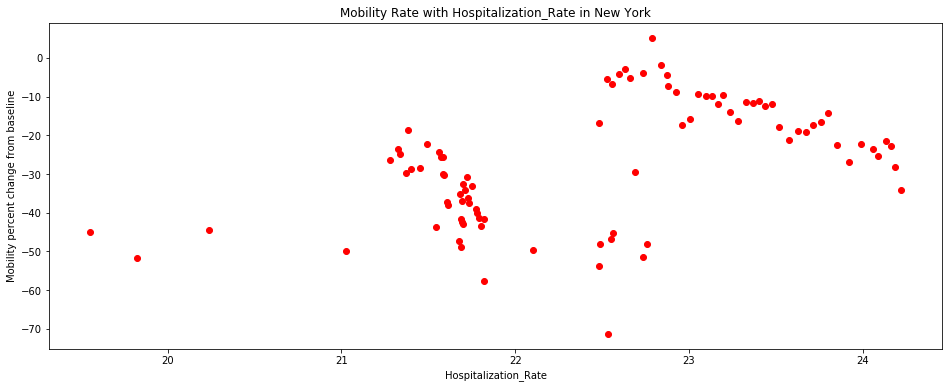

In [560]:
def mobility_with_var(state, var):
    df = return_combined_data(state)
    fig, ax = plt.subplots(figsize=(16, 6))     
    y = df["retail_and_recreation_percent_change_from_baseline"]
    x = df[var]
    plt.title("Mobility Rate with "+var+" in "+state)
    plt.xlabel(var)
    plt.ylabel("Mobility percent change from baseline")
    plt.scatter(x, y,color='r')
    plt.show()
mobility_with_var("New York", "Hospitalization_Rate")                                                         

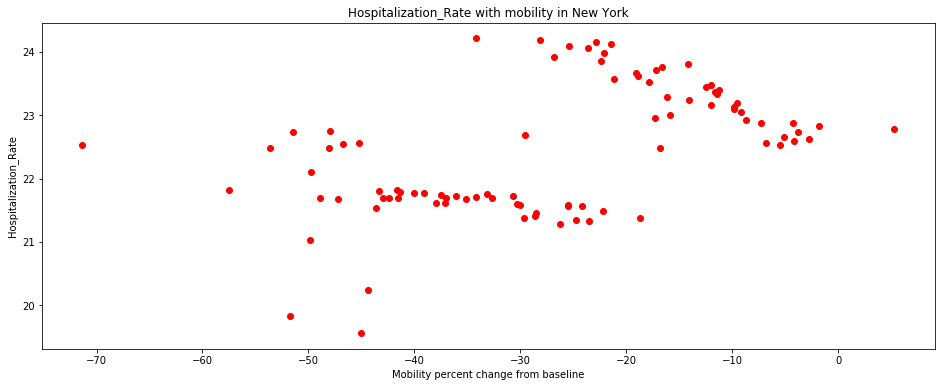

In [660]:
def var_with_mobility(state, var):
    df = return_combined_data(state)
    fig, ax = plt.subplots(figsize=(16, 6))  
    x = df["retail_and_recreation_percent_change_from_baseline"]
    y = df[var]
    #X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    #test_size=0.1,
                                                    #shuffle=False)
    #print(len(X_train), len(y_train))
    #linear_model = LinearRegression(fit_intercept=True)
    #linear_model.fit(X_train, y_train)
    #y_pred = linear_model.predict(x)
    plt.title(var+" with mobility in "+state)
    plt.ylabel(var)
    plt.xlabel("Mobility percent change from baseline")
    plt.scatter(x, y,color='r')
    #plt.plot(x, y_pred, color="k")
    plt.show()
var_with_mobility("New York", "Hospitalization_Rate")                                                         

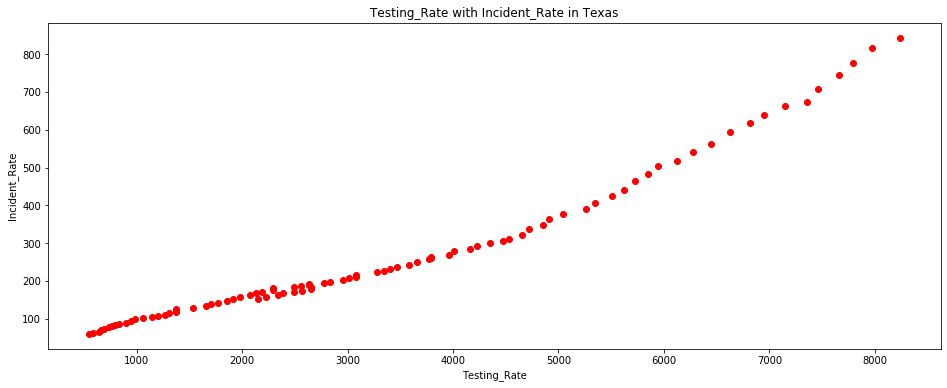

In [658]:
def var_with_var(state, x_var, y_var):
    df = return_combined_data(state)
    fig, ax = plt.subplots(figsize=(16, 6))     
    x = df[x_var]
    y = df[y_var]
    plt.title(x_var+" with "+y_var+" in "+state)
    plt.ylabel(y_var)
    plt.xlabel(x_var)
    plt.scatter(x, y,color='r')
    plt.show()
#var_with_var("Texas", "Hospitalization_Rate", "Mortality_Rate")
var_with_var("Texas", "Testing_Rate", "Incident_Rate")

In [630]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Date,Severity,Closed,Survival_Probability
0,Alabama,3563,93,NaN,3470.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945,2020-04-12,14.875105,NaN,97.389840
1,Alaska,272,8,66.0,264.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059,2020-04-12,14.338235,74.0,97.058824
2,Arizona,3542,115,NaN,3427.0,48.662422,42109.0,NaN,3.246753,578.522286,NaN,2020-04-12,NaN,NaN,96.753247
3,Arkansas,1280,27,367.0,1253.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250,2020-04-12,12.265625,394.0,97.890625
4,California,22795,640,NaN,22155.0,58.137726,190328.0,5234.0,2.812020,485.423868,22.961176,2020-04-12,25.773196,NaN,97.192367


In [741]:
state_proportions  = df.groupby(["Province_State"]).last()
state_proportions = state_proportions[["Confirmed", "Deaths", "Recovered"]]
state_proportions["Confirmed"] = state_proportions["Confirmed"]/sum(state_proportions["Confirmed"])
state_proportions["Deaths"] = state_proportions["Deaths"]/sum(state_proportions["Deaths"])
state_proportions["Recovered"] = state_proportions["Recovered"]/sum(state_proportions["Recovered"])
state_proportions = state_proportions.sort_values(["Confirmed"],ascending=False).style.background_gradient(cmap="Reds")
print(state_proportions)

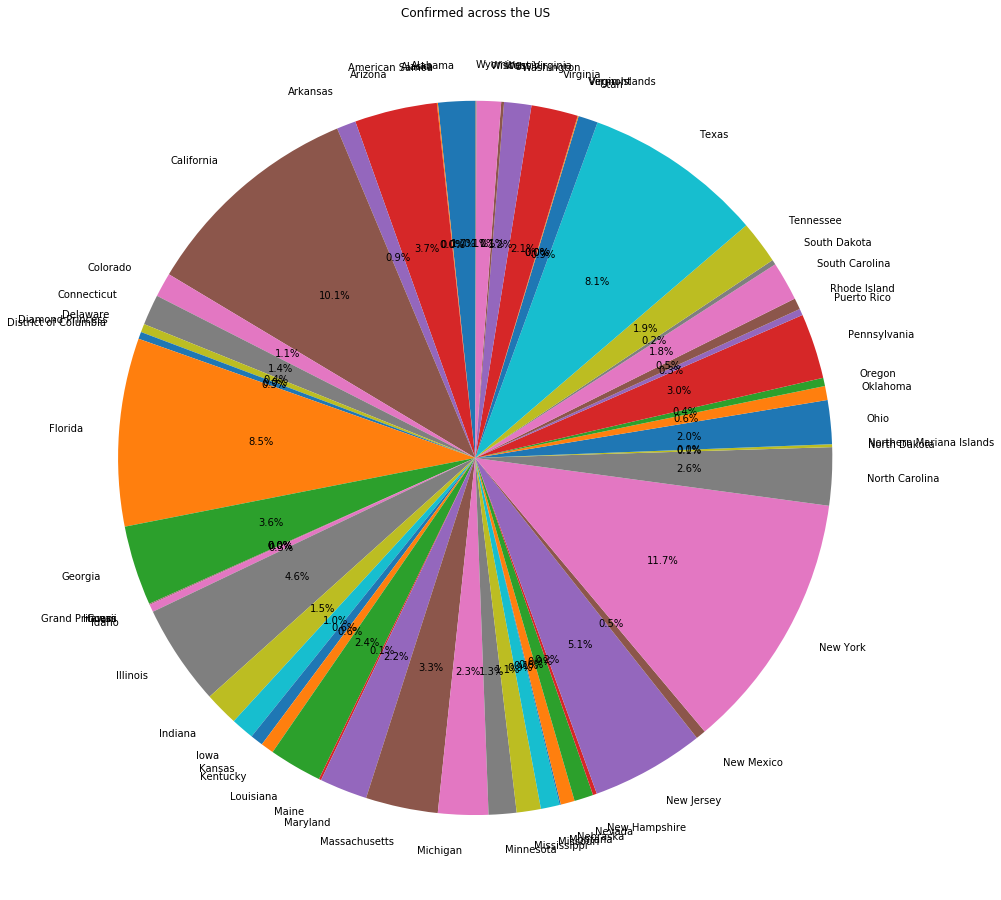

In [563]:
#state percent of US
var ="Confirmed"
fig1, ax1 = plt.subplots(figsize=(16, 16))
ax1.axis('equal')
vals = df.loc[df["Date"]==df["Date"].iloc[-1], var].fillna(0)
labels = df.loc[df["Date"]==df["Date"].iloc[-1], "Province_State"]
ax1.pie(vals.values, labels=labels.values, autopct='%1.1f%%', startangle=90)
plt.title(var+ " across the US")
plt.show()

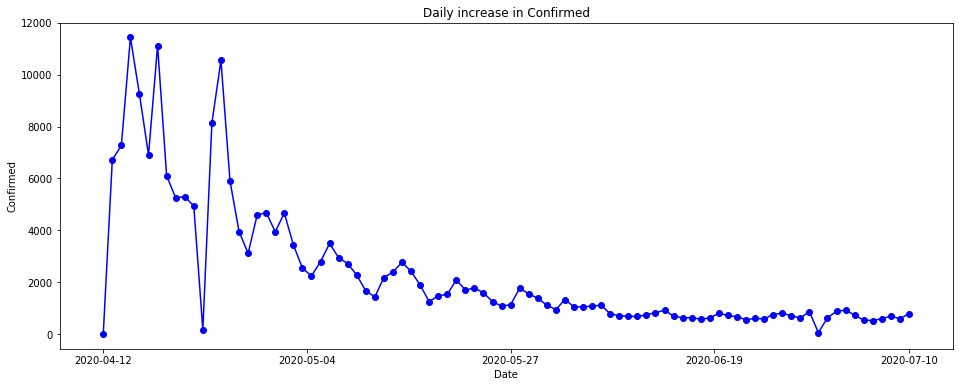

In [661]:
#daily increase in cases
def graph_daily_increase(state, var):
    fig, ax = plt.subplots(figsize=(16, 6))
    df = return_combined_data(state)
    x = df["Date"]
    y = df[var].diff().fillna(0)
    plt.title("Daily increase in "+var)
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.xticks([0, x.shape[0]/4, x.shape[0]/2, x.shape[0]/4*3, x.shape[0]-1])
    plt.scatter(x, y, color = "b")
    plt.plot(x, y, color = "b")
graph_daily_increase("New York", "Confirmed")

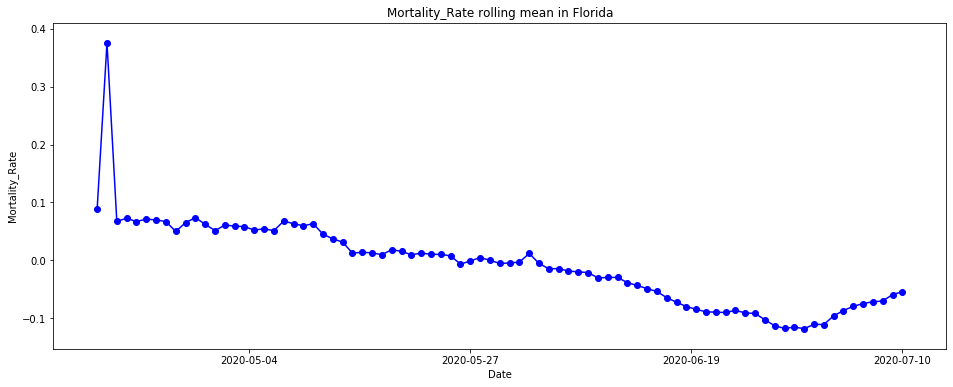

In [592]:
def graph_rolling_mean(state, var):
    fig, ax = plt.subplots(figsize=(16, 6))
    df = return_combined_data(state)
    x = df["Date"]
    y = df[var].diff().rolling(window=7).mean()
    plt.title(var+" rolling mean in "+state)
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.xticks([0, x.shape[0]/4, x.shape[0]/2, x.shape[0]/4*3, x.shape[0]-1])
    plt.scatter(x, y, color = "b")
    plt.plot(x, y, color = "b")
graph_rolling_mean("Florida", "Mortality_Rate")                                                

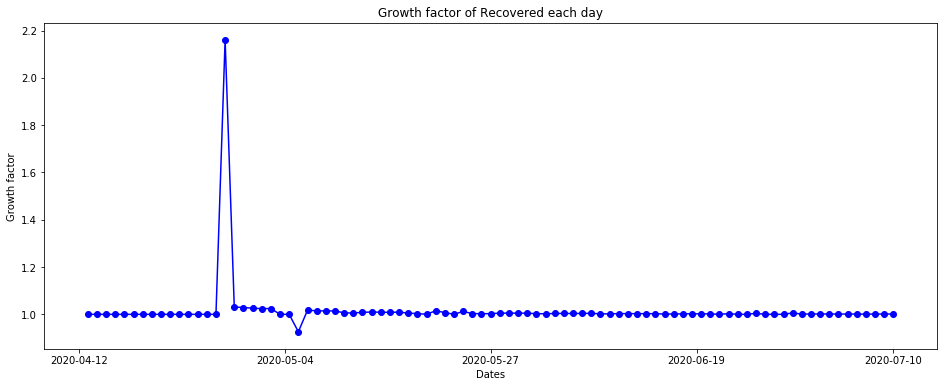

In [597]:
def graph_growth_factor(state, var):
    fig, ax = plt.subplots(figsize=(16, 6))
    df = return_combined_data(state)
    x = df["Date"]
    y = df[var]/df[var].shift()
    plt.title("Growth factor of "+var+" each day")
    plt.xlabel("Dates")
    plt.ylabel("Growth factor")
    plt.xticks([0, x.shape[0]/4, x.shape[0]/2, x.shape[0]/4*3, x.shape[0]-1])
    plt.scatter(x, y, color = "b")
    plt.plot(x, y, color = "b")
graph_growth_factor("New York", "Recovered")

## Datewise analysis by state

In [567]:
covid = pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [568]:
def open_and_read_csv(dt):
    dt_month = dt.split("-")[1]
    dt_day = dt.split("-")[2]
    dt_year = "2020"
    dt_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/"+dt_month+"-"+dt_day+"-"+dt_year+".csv"
    df = pd.read_csv(dt_url)
    df = df[["Province_State", "Confirmed", "Deaths", "Recovered", "Active", "Incident_Rate", "People_Tested", "People_Hospitalized", "Mortality_Rate", "Testing_Rate", "Hospitalization_Rate"]]
    dates = []
    for i in range(df.shape[0]):
        dates.append(dt)
    df["Date"] = dates
    return df

In [569]:
from datetime import date
from datetime import timedelta
import numpy as np
from datetime import datetime
today = datetime.date(datetime.now())
dt = date(2020, 4, 12)
df = open_and_read_csv(str(dt))
for i in range((today-dt).days-1):
    dt += timedelta(days=1)
    df = pd.concat([df, open_and_read_csv(str(dt))])

In [570]:
df["Severity"] = df["Mortality_Rate"]+df["Hospitalization_Rate"]
df["Closed"] = df["Recovered"]+df["Deaths"]
df["Survival_Probability"] = (1-(df["Deaths"]/df["Confirmed"]))*100
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Date,Severity,Closed,Survival_Probability
0,Alabama,3563,93,NaN,3470.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945,2020-04-12,14.875105,NaN,97.389840
1,Alaska,272,8,66.0,264.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059,2020-04-12,14.338235,74.0,97.058824
2,Arizona,3542,115,NaN,3427.0,48.662422,42109.0,NaN,3.246753,578.522286,NaN,2020-04-12,NaN,NaN,96.753247
3,Arkansas,1280,27,367.0,1253.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250,2020-04-12,12.265625,394.0,97.890625
4,California,22795,640,NaN,22155.0,58.137726,190328.0,5234.0,2.812020,485.423868,22.961176,2020-04-12,25.773196,NaN,97.192367


In [359]:
covid_us = covid.loc[covid["Country/Region"]=="US"]
covid_us.drop(["SNo"], axis=1, inplace=True)
covid_us.head()                                                                                

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0


In [571]:
def get_covid_data(state):
    return covid_us.loc[covid_us["Province/State"]== state, :]
covid_ny = get_covid_data("New York")
state = "New York"

In [572]:
covid_ny["ObservationDate"]=pd.to_datetime(covid_ny["ObservationDate"])
covid_ny.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4549,2020-03-10,New York,US,2020-03-10T17:13:27,173.0,0.0,0.0
4755,2020-03-11,New York,US,2020-03-11T22:53:03,220.0,0.0,0.0
4964,2020-03-12,New York,US,2020-03-12T21:39:10,328.0,0.0,0.0
5356,2020-03-13,New York,US,2020-03-11T20:00:00,421.0,0.0,0.0
5411,2020-03-14,New York,US,2020-03-14T22:13:32,525.0,2.0,0.0


In [573]:
def get_datewise(state):
    datewise=get_covid_data(state).groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
    datewise["Days Since"]=datewise.index-datewise.index.min()
    return datewise
get_datewise("Florida").head()

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-03-10,15.0,0.0,2.0,0 days
2020-03-11,28.0,0.0,2.0,1 days
2020-03-12,35.0,0.0,2.0,2 days
2020-03-13,50.0,0.0,2.0,3 days
2020-03-14,76.0,0.0,3.0,4 days


In [574]:
def get_info(state):
    datewise = get_datewise(state)
    print("Total number of Confirmed Cases in ", state, ": ", datewise["Confirmed"].iloc[-1])
    print("Total number of Recovered Cases in  ",state, ": ", get_state_df(state)["Recovered"].iloc[-1])
    print("Total number of Deaths Cases in ", state, ": ", datewise["Deaths"].iloc[-1])
    print("Total number of Active Cases in ", state, ": ", (datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
    print("Total number of Closed Cases in ", state, ": " ,get_state_df(state)["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
    print("Approximate number of Confirmed Cases per Day in ", state, ": ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
    print("Approximate number of Recovered Cases per Day in ", state, ": ",np.round(get_state_df(state)["Recovered"].iloc[-1]/get_state_df(state).shape[0]))
    print("Approximate number of Death Cases per Day in ", state, ": ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
    print("Approximate number of Confirmed Cases per hour in ", state, ": ", np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
    print("Approximate number of Recovered Cases per hour in ", state, ": ",np.round(get_state_df(state)["Recovered"].iloc[-1]/((get_state_df(state).shape[0])*24)))
    print("Approximate number of Death Cases per hour in ", state, ": ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
    print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
    print("Number of Recovered Cases in last 24 hours: ",get_state_df(state)["Recovered"].iloc[-1]-get_state_df(state)["Recovered"].iloc[-2])
    print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

In [575]:
get_info("New York")

Total number of Confirmed Cases in  New York :  398929.0
Total number of Recovered Cases in   New York :  71692.0
Total number of Deaths Cases in  New York :  32251.0
Total number of Active Cases in  New York :  366678.0
Total number of Closed Cases in  New York :  103943.0
Approximate number of Confirmed Cases per Day in  New York :  3297.0
Approximate number of Recovered Cases per Day in  New York :  763.0
Approximate number of Death Cases per Day in  New York :  267.0
Approximate number of Confirmed Cases per hour in  New York :  137.0
Approximate number of Recovered Cases per hour in  New York :  32.0
Approximate number of Death Cases per hour in  New York :  11.0
Number of Confirmed Cases in last 24 hours:  692.0
Number of Recovered Cases in last 24 hours:  49.0
Number of Death Cases in last 24 hours:  8.0


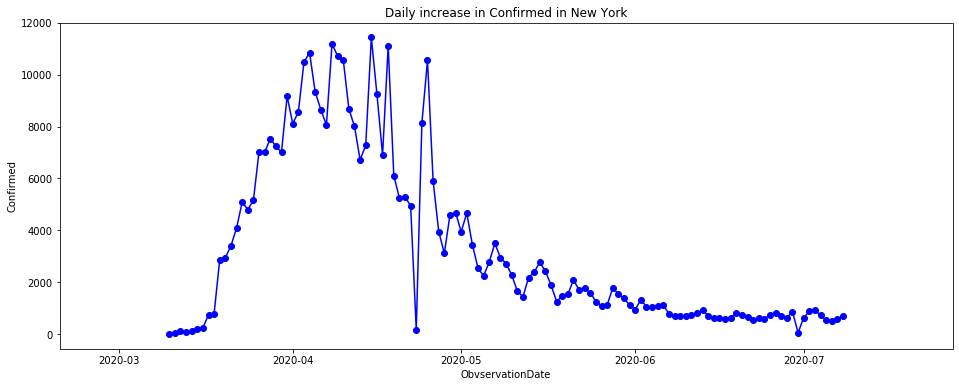

In [678]:
def daily_increase_datewise(state, var):
    fig, ax = plt.subplots(figsize=(16, 6))
    df = get_datewise(state)
    x = np.array(df.index)
    y = df[var].diff().fillna(0)
    plt.title("Daily increase in "+var+ " in "+state)
    plt.xlabel("ObvservationDate")
    plt.ylabel(var)
    #plt.xticks([0, x.shape[0]/4, x.shape[0]/2, x.shape[0]/4*3, x.shape[0]-1])
    plt.scatter(x, y, color = "b")
    plt.plot(x, y, color = "b")
daily_increase_datewise("New York", "Confirmed")

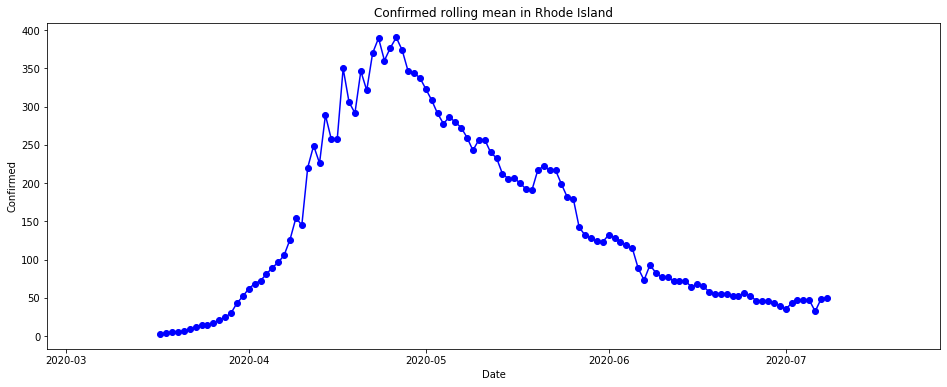

In [677]:
def rolling_mean_datewise(state, var):
    fig, ax = plt.subplots(figsize=(16, 6))
    df = get_datewise(state)
    x = np.array(df.index)
    y = df[var].diff().rolling(window=7).mean()
    plt.title(var+" rolling mean in "+state)
    plt.xlabel("Date")
    plt.ylabel(var)
    #plt.xticks([0, x.shape[0]/4, x.shape[0]/2, x.shape[0]/4*3, x.shape[0]-1])
    plt.scatter(x, y, color = "b")
    plt.plot(x, y, color = "b")
rolling_mean_datewise("Rhode Island", "Confirmed")

121
121


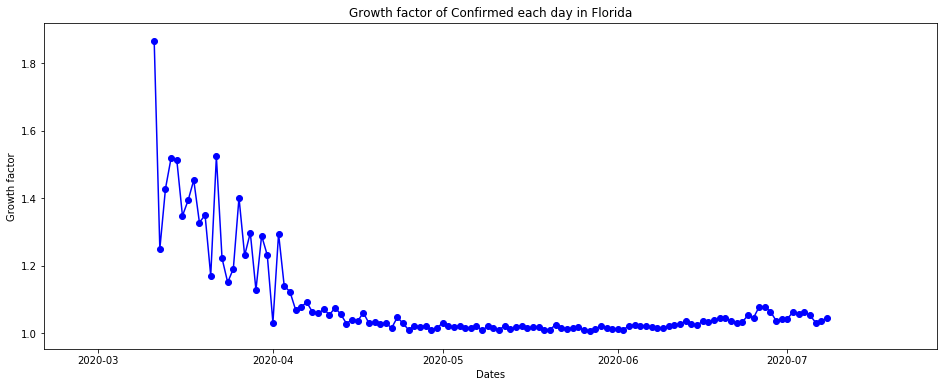

In [676]:
def growth_factor_datewise(state, var):
    fig, ax = plt.subplots(figsize=(16, 6))
    df = get_datewise(state)
    x = np.array(df.index)
    print(len(x))
    y = df[var]/df[var].shift()
    print(len(y))
    plt.title("Growth factor of "+var+" each day in "+ state)
    plt.xlabel("Dates")
    plt.ylabel("Growth factor")
    #plt.xticks([0, x.shape[0]/4, x.shape[0]/2, x.shape[0]/4*3, x.shape[0]-1])
    plt.scatter(x, y, color = "b")
    plt.plot(x, y, color = "b")
growth_factor_datewise("Florida", "Confirmed")

   No. of Cases Days Since first Case Days requried for rise of 200K
0      100000.0               23 days                        23 days
1      300000.0               50 days                        27 days


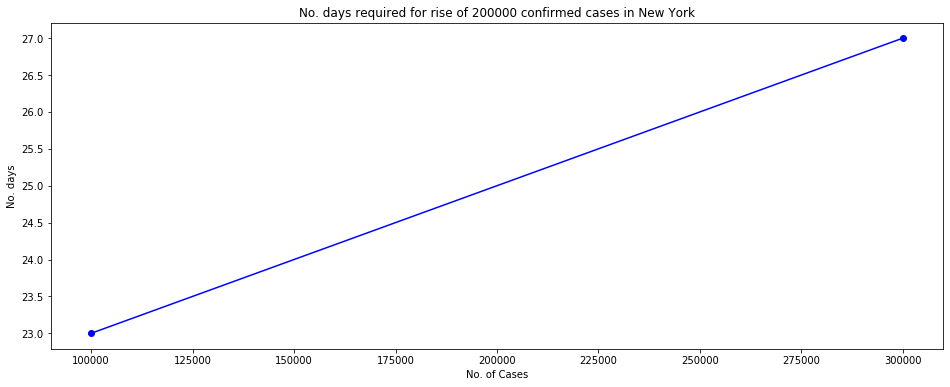

In [579]:
def days_for_rise_200k(state):
    fig, ax = plt.subplots(figsize=(16, 6))
    NUM = 200000
    datewise = get_datewise(state)
    c1=NUM/2
    days_200k=[]
    C1=[]
    while(1):
        days_200k.append(datewise[datewise["Confirmed"]<=c1].iloc[[-1]]["Days Since"][0])
        C1.append(c1)
        c1=c1+NUM
        if(c1<datewise["Confirmed"].max()):
            continue
        else:
            break

    rate_200k=pd.DataFrame(list(zip(C1,days_200k)),columns=["No. of Cases","Days Since first Case"])
    rate_200k["Days requried for rise of 200K"]=rate_200k["Days Since first Case"].diff().fillna(rate_200k["Days Since first Case"].iloc[[0]][0])
    print(rate_200k)
    plt.title("No. days required for rise of "+str(NUM)+ " confirmed cases in "+state)
    plt.xlabel("No. of Cases")
    plt.ylabel("No. days")
    plt.scatter(rate_200k["No. of Cases"], rate_200k["Days requried for rise of 200K"].dt.days, color="b")
    plt.plot(rate_200k["No. of Cases"], rate_200k["Days requried for rise of 200K"].dt.days, color="b")
days_for_rise_200k("New York")

In [600]:
def doubling_rate(state):
    datewise = get_datewise(state)
    c=datewise["Confirmed"].iloc[0]
    double_days=[]
    C=[]
    while(1):
        double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days Since"][0])
        C.append(c)
        c=c*2
        if(c<datewise["Confirmed"].max()):
            continue
        else:
            break
    doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first Case"])
    doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])
    return doubling_rate
doubling_rate("Florida")

,No. of cases,Days since first Case,Number of days for doubling
0,15.0,0 days,0 days
1,30.0,1 days,1 days
2,60.0,3 days,2 days
3,120.0,5 days,2 days
4,240.0,7 days,2 days
5,480.0,9 days,2 days
6,960.0,11 days,2 days
7,1920.0,15 days,4 days
8,3840.0,18 days,3 days
9,7680.0,22 days,4 days


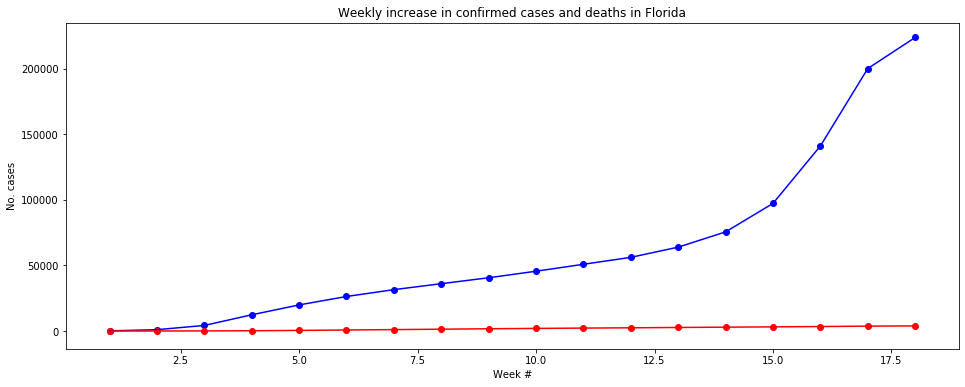

In [603]:
#weekly data
def plot_by_week(state):
    fig, ax = plt.subplots(figsize=(16, 6))
    df = get_datewise(state)
    df["WeekOfYear"]=df.index.weekofyear
    week_num=[]
    weekwise_confirmed=[]
    weekwise_recovered=[]
    weekwise_deaths=[]
    w=1
    for i in list(df["WeekOfYear"].unique()):
        weekwise_confirmed.append(df[df["WeekOfYear"]==i]["Confirmed"].iloc[-1])
        weekwise_deaths.append(df[df["WeekOfYear"]==i]["Deaths"].iloc[-1])
        week_num.append(w)
        w=w+1
    plt.title("Weekly increase in confirmed cases and deaths in "+state)
    plt.xlabel("Week #")
    plt.ylabel("No. cases")
    plt.scatter(week_num, weekwise_confirmed, color = "b")
    plt.scatter(week_num, weekwise_deaths, color = "r")
    plt.plot(week_num, weekwise_confirmed, color = "b")
    plt.plot(week_num, weekwise_deaths, color = "r")
plot_by_week("Florida")

In [345]:
#data['moving_avg_var'] = data['var'].diff().rolling(window=rolling_average_days).mean()

In [346]:
#variable of interest = new cases, active, mortality rate, hopitalization rate
#how to calculate severity?
#(new cases + active cases) * mortality rate

In [347]:
#interactive graphs with matplotlib
#active cases graphs
#use weekly data
# new cases each day/week
#seven day moving average
#growth factor
#active/closed cases?
#propotion of state case within US
#survival probablity
#merge all three datasets

#group countries together by mortality rates and recovery rates
#use polynomial regression?

In [ ]:
#https://covidtracking.com/api/v1/us/daily.csv
#https://covidtracking.com/api/v1/states/daily.csv
#https://covidtracking.com/data/download

In [662]:
return_combined_data("New York").columns

Index(['Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate', 'Date',
       'Severity', 'Closed', 'Survival_Probability',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline'],
      dtype='object')

In [699]:
def request_general_var():
    return input("Enter one of the following variables: '\nConfirmed'\n'Deaths'\n'Recovered'\n'Active'\n'Incident_Rate'\n'People_Tested'\n'People_Hospitalized'\n'Mortality_Rate'\n'Testing_Rate'\n'Hospitalization_Rate'\n'Date'\n'Severity'\n'Closed'\n'Survival_Probability'\n")

In [696]:
def request_var():
    return input("Enter one of the following variables: \n'Confirmed'\n'Deaths'\n'Recovered'\n'Active'\n'Incident_Rate'\n'People_Tested'\n'People_Hospitalized'\n'Mortality_Rate'\n'Testing_Rate'\n'Hospitalization_Rate'\n'Date'\n'Severity'\n'Closed'\n'Survival_Probability'\n'retail_and_recreation_percent_change_from_baseline'\n'grocery_and_pharmacy_percent_change_from_baseline'\n'transit_stations_percent_change_from_baseline'\n'workplaces_percent_change_from_baseline'\n")

In [697]:
def request_mobility():
    return input("Enter one of the following variables: \n'retail_and_recreation_percent_change_from_baseline'\n'grocery_and_pharmacy_percent_change_from_baseline'\n'transit_stations_percent_change_from_baseline'\n'workplaces_percent_change_from_baseline'\n")

In [744]:
def menu():
    answer = int(input("Enter one of the following options: \n1) graph the mobility of a state since february \n2) graph confirmed cases of a state since January \n3) graph a given variable over time for a state \n4) graph the relationship of two given variables in a state \n5) graph the daily increase in a given variable in any state \n6) graph the rolling mean of a given variable in any state \n7) graph the growth factor in a given variable in any state \n8) return a data frame showing the doubling rate in confirmed cases for any state \n9) plot any state’s confirmed cases and deaths by week \n10) predict and graph any state’s confirmed cases for the next two weeks\n"))
    state = input("Enter a state: ")
    if answer == 1:
        graph_state_mobility(state, request_mobility())
    elif answer == 2:
        graph_state_confirmed(state)
    elif answer == 3:
        graph_var_overtime(state, request_general_var())
    elif answer == 4:
        print("X value:")
        v1 = request_var()
        print("Y value:")
        v2 = input("Enter another variable")
        var_with_var(state, v1, v2)
    elif answer == 5:
        var = request_general_var()
        if var == "Confirmed" or var == "Deaths":
            daily_increase_datewise(state, var)
        else:
            graph_daily_increase(state, var)
    elif answer == 6:
        var = request_general_var()
        if var == "Confirmed" or var == "Deaths":
            rolling_mean_datewise(state, var)
        else:
            graph_rolling_mean(state, var)
    elif answer == 7:
        var = request_general_var()
        if var == "Confirmed" or var == "Deaths":
            growth_factor_datewise(state, var)
        else:
            graph_growth_factor(state, var)
    elif answer == 8:
        doubling_rate(state)
    elif answer == 9:
        plot_by_week(state)
    elif answer == 10:
        predict_confirmed(state)                 
menu()

KeyboardInterrupt: 

In [743]:
state_proportions

,Confirmed,Deaths,Recovered
Province_State,,,
New York,0.11749,0.23748,0.0612847
California,0.10089,0.0531268,0
Florida,0.084984,0.0323084,0
Texas,0.0814719,0.0246362,0.121727
New Jersey,0.0512636,0.114182,0.0267717
Illinois,0.0456461,0.0543652,0
Arizona,0.0373289,0.0171251,0.0134021
Georgia,0.0361242,0.0223792,0
Massachusetts,0.032676,0.0611141,0.080651


## Fbprophet

In [1]:
#!pip install fbprophet

In [3]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

ImportError: cannot import name 'easter' from 'holidays' (//anaconda3/lib/python3.7/site-packages/holidays/__init__.py)

In [2]:

def fbprophet(state):
    m = Prophet()
    m.add_seasonality(name = "monthly", period=30.5)
    datewise = return_combined_data(state)[["Confirmed", "Recovered", "Deaths", "Date"]]
    confirmed = datewise[["Confirmed", "Date"]]
    recovered = datewise[["Recovered", "Date"]]
    deaths = datewise[["Deaths", "Date"]]
    confirmed.rename(columns={"Confirmed":"y", "Date":"ds"}, inplace=True)
    train = confirmed[:72]
    test = confirmed[72:]
    m.fit(train)
    future_dates = m.make_future_dataframe(periods=15)
    prediction = m.predict(future_dates)
    m.plot(prediction)
    m.plot_components(prediction)
    plt.plot(test.index, test['Confirmed'])
    fig = m.plot(prediction)
    c = add_changepoints_to_plot(fig.gca(), m, prediction)
    return datewise
fbprophet("Florida").head()

ImportError: cannot import name 'easter' from 'holidays' (//anaconda3/lib/python3.7/site-packages/holidays/__init__.py)

In [719]:
#Using the method in other jupyter notebook
def datewise_forecasting(state, var):
    datewise = get_datewise(state)
    prophet_=Prophet(interval_width=0.95,weekly_seasonality=True,)
    prophet_var=pd.DataFrame(zip(list(datewise.index),list(datewise[var])),columns=['ds','y'])
    prophet_.fit(prophet_var)
    forecast_=prophet_.make_future_dataframe(periods=17)
    forecast_var=forecast_.copy()
    var_forecast=prophet_.predict(forecast_)
    print(prophet_.plot(var_forecast))
    print(prophet_.plot_components(var_forecast))

In [731]:
def state_forecasting(state, var):
    datewise = return_combined_data(state)
    prophet_=Prophet(interval_width=0.95,weekly_seasonality=True,)
    prophet_var=pd.DataFrame(zip(list(datewise["Date"]),list(datewise[var])),columns=['ds','y'])
    prophet_.fit(prophet_var)
    forecast_=prophet_.make_future_dataframe(periods=17)
    forecast_var=forecast_.copy()
    var_forecast=prophet_.predict(forecast_)
    print(prophet_.plot(var_forecast))
    print(prophet_.plot_components(var_forecast))

In [723]:
return_combined_data("New York").head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Date,Severity,Closed,Survival_Probability,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline
0,New York,189033,9385,23887.0,179648.0,1121.124012,461601.0,42594.0,4.964742,2737.680538,22.532574,2020-04-12,27.497315,33272.0,95.035258,-71.326531,-46.380000,-58.343750,-41.451613
1,New York,195749,10058,23887.0,185691.0,1160.955517,478357.0,42712.0,5.138213,2837.057652,21.819779,2020-04-13,26.957992,33945.0,94.861787,-57.520833,-25.509434,-57.657143,-51.258065
2,New York,203020,10842,23887.0,192178.0,1204.078637,499143.0,46201.0,5.340361,2960.336041,22.756871,2020-04-14,28.097232,34729.0,94.659639,-47.959184,-11.754717,-47.285714,-49.741935
3,New York,214454,11617,23887.0,202837.0,1271.891833,526012.0,46201.0,5.417013,3119.691715,21.543548,2020-04-15,26.960560,35504.0,94.582987,-43.620000,-10.038462,-47.891892,-49.677419
4,New York,223691,14832,23887.0,208859.0,1326.674980,550579.0,50450.0,6.630575,3265.394601,22.553433,2020-04-16,29.184008,38719.0,93.369425,-46.725490,-10.811321,-51.378378,-49.806452
